<a href="https://colab.research.google.com/github/KamilShape/heart_disease_classification/blob/main/heart_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
#libraries import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
!git clone https://github.com/KamilShape/data_bases

Cloning into 'data_bases'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17 (delta 4), reused 15 (delta 2), pack-reused 0
Unpacking objects: 100% (17/17), 8.17 MiB | 5.66 MiB/s, done.


In [3]:
heart = pd.read_csv('data_bases/heart.csv')

### SETTINGS

In [73]:
plt.style.use('bmh')

### DATA BASE EXPLANATION

source: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

*   age - age in years
*   sex - 1 = male; 0 = female
*   cp - chest pain type
*   trestbps - resting blood pressure (in mm Hg on admission to the hospital)
*   chol - serum cholestoral in mg/dl
*   fbs - (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
*   restecg - resting electrocardiographic results
*   thalach - maximum heart rate achieved
*   exang - exercise induced angina (1 = yes; 0 = no)
*   oldpeak - ST depression induced by exercise relative to rest
*   slope - the slope of the peak exercise ST segment
*   ca - number of major vessels (0-3) colored by flourosopy
*   thal - 1 = normal; 2 = fixed defect; 3 = reversable defect
*   target - 1 or 0















### DATA BASE ANALYSIS

In [5]:
#data base
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


(array([  4.,  39., 109., 125., 120., 205., 219., 149.,  46.,   9.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <BarContainer object of 10 artists>)

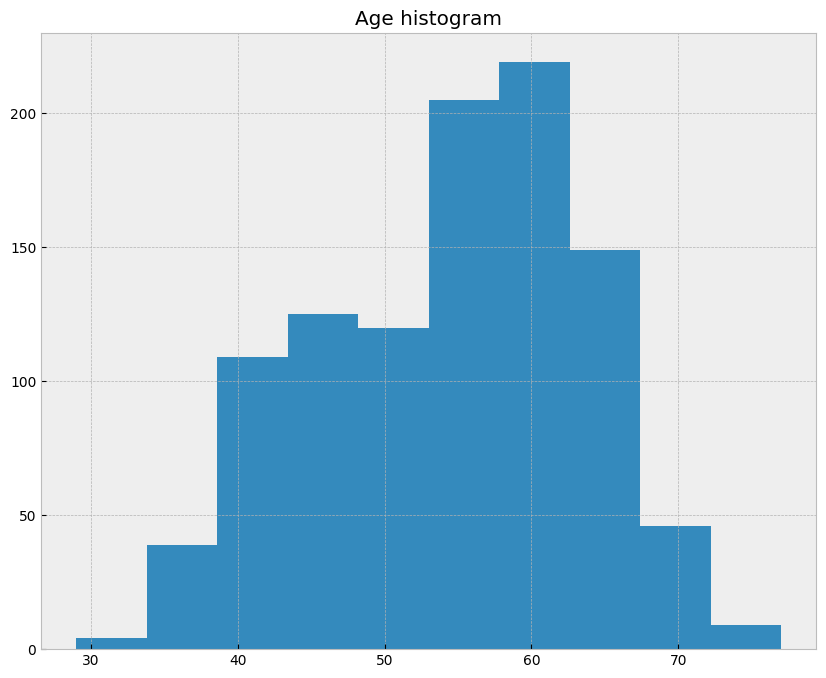

In [74]:
#age histogram
fig, ax = plt.subplots(figsize = (10,8))
ax.set_title('Age histogram')
ax.hist(heart['age'])
# plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r') 

In [7]:
#shapiro - wilk test
shapiro_test = stats.shapiro(heart['age'])
shapiro_test.pvalue
#p<0,05 - no bell curve

5.04160047043456e-09

In [8]:
#add age range column
heart['age range'] = pd.cut(x = heart['age'], 
                            bins = [20,30,40,50,60,70,80], 
                            labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

In [24]:
#sorted postive tests by age range
positive_group = heart[heart['target'] == 1]
sorted_positive_group = pd.DataFrame(positive_group['age range'].value_counts().values, positive_group['age range'].value_counts().index).reset_index().sort_values(by='index')
sorted_positive_group.columns = ['age range', 'tests number'] 
sorted_positive_group['tests percent'] = (sorted_positive_group['tests number']/sorted_positive_group['tests number'].sum()*100).round(decimals = 2)

,age range,tests number,tests percent
5,20-30,4,0.76
3,30-40,41,7.79
1,40-50,166,31.56
0,50-60,204,38.78
2,60-70,94,17.87
4,70-80,17,3.23


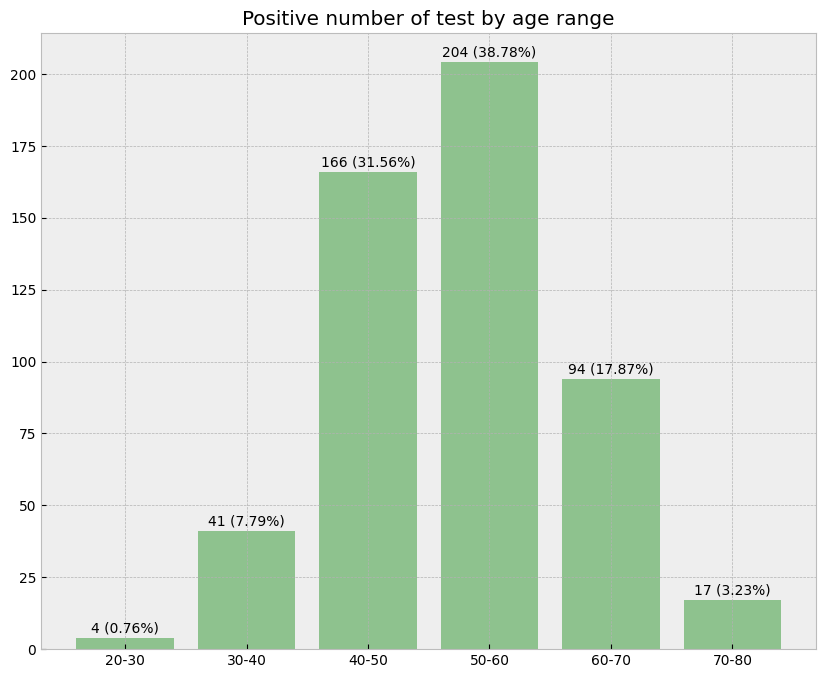

In [50]:
#positive number of test by age range
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(sorted_positive_group['age range'], sorted_positive_group['tests number'], color='g', alpha=0.4)
ax.set_title('Positive number of test by age range')

for i in range(0, len(sorted_positive_group)):
  ax.annotate(str(sorted_positive_group['tests number'][i]) + ' ' +'(' + str(sorted_positive_group['tests percent'][i]) + '%' + ')', 
              (sorted_positive_group['age range'][i], sorted_positive_group['tests number'][i]+2),
              ha='center')

[Text(0.5, 1.0, 'Correlation map')]

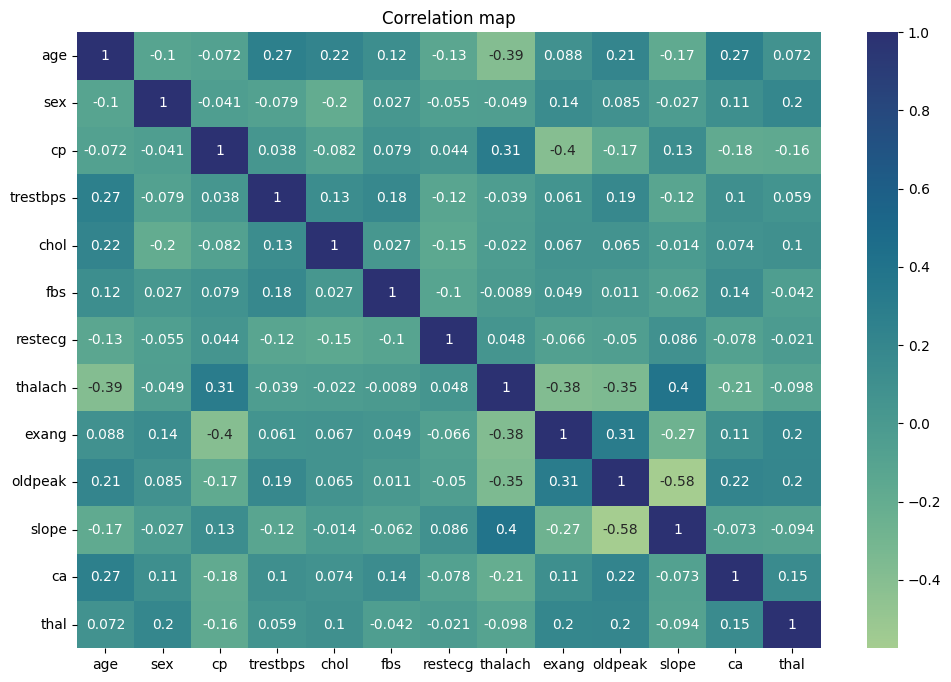

In [77]:
#correlation map
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
sns.heatmap(heart.iloc[:,:-2].corr(), annot=True, cmap="crest").set(title='Correlation map')
